# **Fourier Transformation and Intuition**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## **Signal Basis**

**Description**: We're going to randomly generate frequencies for signals using numpy and hopefully (fingers crossed) we manage to find these frequency coefficients by utilizing a Fourier-Based Decomposition of Summed up signals 

In [101]:
N = 300 # np.random.randint(low=5, high=200) # Stochastic number of signals to be summed

signal_data = []

for _ in range(N):
    shift = np.random.randint(0, 5)
    rand_freq = np.random.randint(1, 10)
    rand_amp = 1 #np.random.randint(1, 10)
    data = (shift, rand_freq, rand_amp)

    signal_data.append(data)

signal_data = np.array(signal_data)

print(f"Number of Signals: {N}")
print(f"Spanning Vertical Shift: {shift}")

print("Signal Format: (Shift, Frequency, Amplitude): [--", end="")
for signal in signal_data:
    print(f"({signal[0]}, {signal[1]}, {signal[2]})", end="--")
print("]")

Number of Signals: 300
Spanning Vertical Shift: 3
Signal Format: (Shift, Frequency, Amplitude): [--(0, 6, 1)--(1, 6, 1)--(4, 7, 1)--(1, 4, 1)--(4, 5, 1)--(4, 2, 1)--(2, 1, 1)--(2, 7, 1)--(1, 1, 1)--(2, 6, 1)--(1, 7, 1)--(3, 9, 1)--(3, 7, 1)--(4, 9, 1)--(2, 9, 1)--(3, 6, 1)--(1, 4, 1)--(3, 8, 1)--(3, 5, 1)--(2, 1, 1)--(4, 6, 1)--(2, 4, 1)--(1, 7, 1)--(4, 3, 1)--(1, 7, 1)--(0, 6, 1)--(2, 4, 1)--(1, 6, 1)--(3, 4, 1)--(0, 9, 1)--(2, 7, 1)--(2, 1, 1)--(1, 5, 1)--(2, 6, 1)--(2, 9, 1)--(2, 6, 1)--(2, 7, 1)--(3, 7, 1)--(4, 3, 1)--(4, 4, 1)--(2, 8, 1)--(4, 8, 1)--(4, 9, 1)--(1, 7, 1)--(2, 7, 1)--(0, 9, 1)--(4, 8, 1)--(2, 7, 1)--(2, 9, 1)--(2, 2, 1)--(0, 5, 1)--(4, 2, 1)--(2, 8, 1)--(0, 3, 1)--(0, 8, 1)--(4, 8, 1)--(4, 7, 1)--(0, 8, 1)--(4, 9, 1)--(3, 3, 1)--(4, 8, 1)--(2, 5, 1)--(2, 6, 1)--(1, 6, 1)--(4, 5, 1)--(4, 6, 1)--(3, 9, 1)--(0, 6, 1)--(3, 4, 1)--(1, 1, 1)--(1, 1, 1)--(0, 5, 1)--(3, 3, 1)--(0, 4, 1)--(0, 3, 1)--(1, 9, 1)--(4, 3, 1)--(0, 9, 1)--(0, 2, 1)--(4, 6, 1)--(0, 7, 1)--(4, 7, 1)-

In [102]:
def sinusodial(shift, freq, amp, data) -> np.array:
    return np.array(amp * np.sin(2 * np.pi * freq * data + shift)) # Sin signal formula

def sum_signals(signals, start, end, sample_freq) -> list:
    num_signals = len(signals)
    
    summed_signal = np.array([0] * (sample_freq * (end - start)))
    
    steps = np.linspace(start = start, stop = end, num=sample_freq * (end-start))

    for signal in signals:
        shift, freq, amp = signal[0], signal[1], signal[2]

        function_data = sinusodial(shift=shift, freq=freq, amp=amp, data=steps)

        summed_signal = summed_signal + function_data

    return summed_signal

sample_frequency = 100

start_time = 0
end_time = 10

summed_signals = sum_signals(signals=signal_data, start=start_time, end=end_time, sample_freq=sample_frequency)

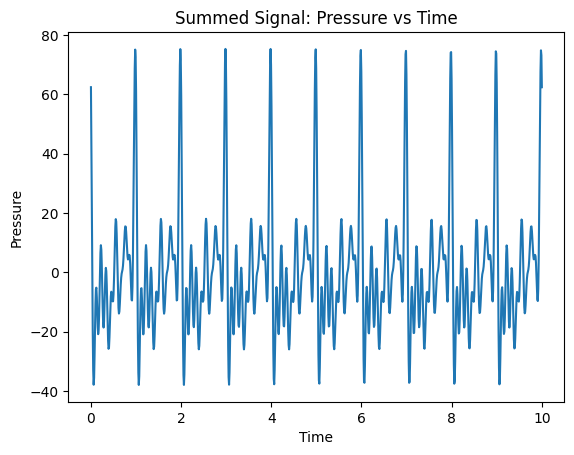

In [103]:
y = summed_signals
x = np.linspace(start=start_time, stop=end_time, num=sample_frequency * (end_time - start_time))

plt.title("Summed Signal: Pressure vs Time")
plt.ylabel("Pressure")
plt.xlabel("Time")
plt.plot(x,y)
plt.show()

## **Fourier Transform**

In [108]:
def wrap(summed_data, wrap_freq, time_steps) -> np.float32:
    wrapped_points = summed_data * np.exp(-2 * np.pi * 1j * wrap_freq * time_steps)

    n = len(wrapped_points)
    real_sum = 0
    imag_sum = 0

    for point in wrapped_points:
        real_sum += point.real
        imag_sum += point.imag
    
    # Now you can normalize and take the unit vector, but doesn't really matter ngl

    real_coord_norm = real_sum / n
    imag_coord_norm = imag_sum / n

    mag_diff = np.float32(np.linalg.norm([real_coord_norm, imag_coord_norm]))

    return mag_diff

center_of_mass_mags = []
for wrapping_frequency in np.linspace(start=1, stop=10, num=1000):
    mag_diff = wrap(summed_signals, wrap_freq=wrapping_frequency, time_steps=x)
    center_of_mass_mags.append(mag_diff)

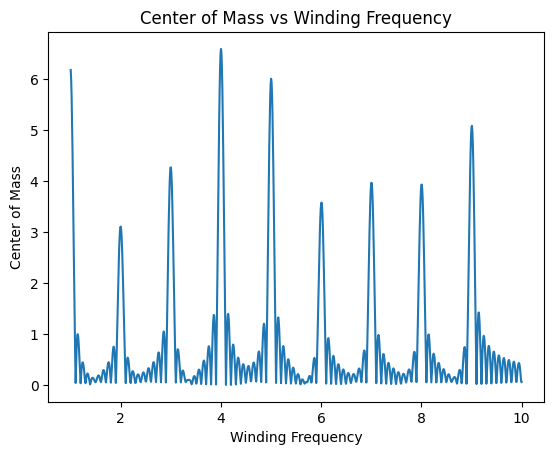

In [109]:
frequencies = np.linspace(start=1, stop=10, num=1000)
center_of_masses = center_of_mass_mags

plt.title("Center of Mass vs Winding Frequency")
plt.xlabel("Winding Frequency")
plt.ylabel("Center of Mass")
plt.plot(frequencies, center_of_masses)
plt.show()